# Python with Keras-Tensorflow (sequential method):

In [1]:
# Import libraries and data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns

In [16]:
# Load and preprocess Fisher Iris data
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris = load_iris()  # Load Fisher Iris data
X = iris["data"]  # Define input data X
y_raw = iris["target"]  # Define raw output data as integer labels

enc = OneHotEncoder()  # Define encoder
Y = enc.fit_transform(y_raw[:, np.newaxis]).toarray()  # One hot encode labels
# fit_transform fits the encoder to the data and then transforms the data.
'''y_raw[:, np.newaxis]: This expression reshapes the y_raw array to have a new axis. 
np.newaxis adds a new axis at the end of the array, effectively converting a 1D array into a 2D 
array with one column. This is necessary because OneHotEncoder in scikit-learn expects a 2D array as input.'''
# .toarray(): This method converts the result of fit_transform into a numpy array.

scaler = StandardScaler()  # Define scaling function
X_scaled = scaler.fit_transform(X)  # Standardize input data
num_features = X.shape[1]  # Number of features
num_classes = Y.shape[1]  # Number of classes

In [15]:
print(X.shape, X[0])
print(y_raw.shape, y_raw[0])
print(Y.shape, Y[0])
print(y_raw[:, np.newaxis].shape, y_raw[0, np.newaxis])

(150, 4) [5.1 3.5 1.4 0.2]
(150,) 0
(150, 3) [1. 0. 0.]
(150, 1) [0]


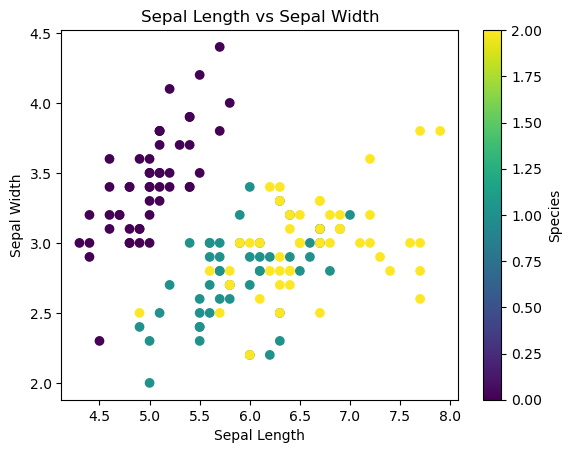

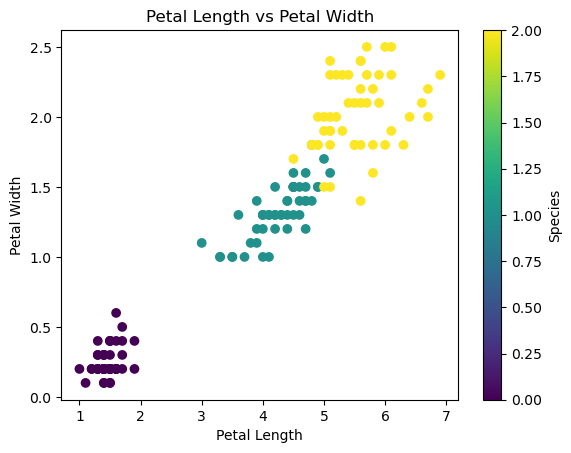

In [18]:
# Plot sepal length vs sepal width
plt.scatter(X[:, 0], X[:, 1], c=y_raw, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.colorbar(label='Species')
plt.show()

# Plot petal length vs petal width
plt.scatter(X[:, 2], X[:, 3], c=y_raw, cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.colorbar(label='Species')
plt.show()

In [19]:
# Split the data set into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_scaled, Y, test_size=0.5, random_state=2)

In [20]:
# Define the deep feedforward network in Keras and display model summary
model = Sequential()
model.add(Dense(12, input_shape=(num_features,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

# Compile the Keras model
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Fit the Keras model on the dataset, store loss and accuracy in history
history = model.fit(X_train, Y_train, epochs=20, batch_size=10, validation_data=(X_val, Y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


2024-02-19 17:09:04.489440: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


8/8 [==============================] - 0s 10ms/step - loss: 1.1068 - accuracy: 0.3467 - val_loss: 1.0982 - val_accuracy: 0.3733
Epoch 2/20
8/8 [==============================] - 0s 2ms/step - loss: 1.0891 - accuracy: 0.3733 - val_loss: 1.0818 - val_accuracy: 0.3600
Epoch 3/20
8/8 [==============================] - 0s 2ms/step - loss: 1.0747 - accuracy: 0.4000 - val_loss: 1.0702 - val_accuracy: 0.3867
Epoch 4/20
8/8 [==============================] - 0s 2ms/step - loss: 1.0637 - accuracy: 0.4133 - val_loss: 1.0596 - val_accuracy: 0.4000
Epoch 5/20
8/8 [==============================] - 0s 2ms/step - loss: 1.0537 - accuracy: 0.4267 - val_loss: 1.0504 - val_accuracy: 0.4267
Epoch 6/20
8/8 [==============================] - 0s 2ms/step - loss: 1.0442 - accuracy: 0.4533 - val_loss: 1.0409 - val_accuracy: 0.4267
Epoch 7/20
8/8 [==============================] - 0s 2ms/step - loss: 1.0353 - accuracy: 0.4533 - val_loss: 1.0315 - val_accuracy: 0.4400
Epoch 8/20
8/8 [============================

3/3 [==============================] - 0s 885us/step


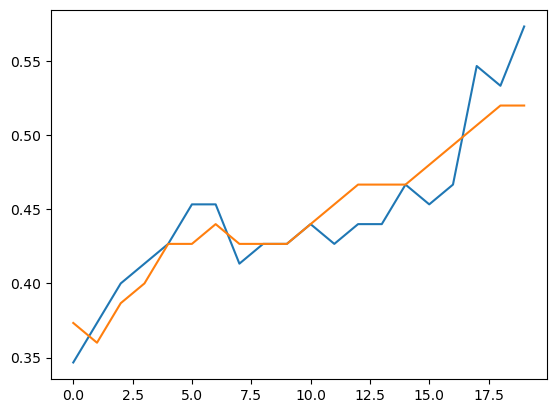

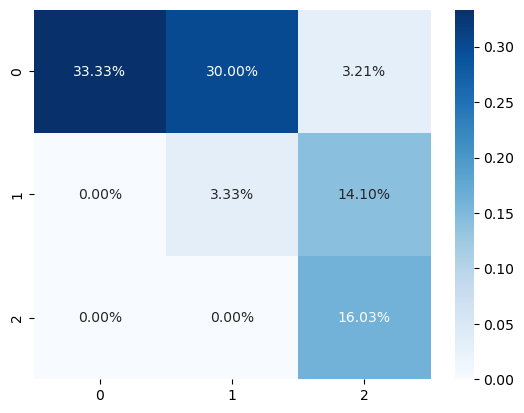

In [21]:
# Plot accuracy over training data
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

# Plot the confusion matrix and visualize nicely using seaborn
Y_pred = model.predict(X_val)
Y_pred_integer = np.argmax(Y_pred, axis=1)
Y_test_integer = np.argmax(Y_val, axis=1)
cm = confusion_matrix(Y_test_integer, Y_pred_integer, normalize="pred")
plt.figure(2)
sns.heatmap(cm / np.sum(cm), annot=True, fmt=".2%", cmap="Blues")
plt.show()

# Python with Keras-Tensorflow (functional method):

In [30]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape=(num_features,))

# Define the deep feedforward network
hidden_layer1 = Dense(12, activation="relu")(input_layer)
hidden_layer2 = Dense(8, activation="relu")(hidden_layer1)
output_layer = Dense(num_classes, activation="softmax")(hidden_layer2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Display model summary
model.summary()

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Fit the model on the dataset, store loss and accuracy in history
history = model.fit(X_train, Y_train, epochs=20, batch_size=10, validation_data=(X_val, Y_val))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_10 (Dense)            (None, 12)                60        
                                                                 
 dense_11 (Dense)            (None, 8)                 104       
                                                                 
 dense_12 (Dense)            (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - 0s 9ms/step - loss: 1.3482 - accuracy: 0.3600 - val_loss: 1.3544 - val_accuracy: 0.3333
Epoch 2/20
8/8 [==============================] - 0s 2ms/